## 회귀분석

In [36]:
import pandas as pd

In [37]:
anal_df = pd.read_csv("C:/data/now_used/real_final_data.csv")
anal_df.head(5)

,건축물대장코드,도시,구시군,읍면동,번,지,입주일,지하총층,지상총층,연면적m2,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
0,11110-10014,서울특별시,종로구,동숭동,1,114,1982-12-24,1,5,1563.66,...,519.940374,1.176,10.477,1,0,0,0,0,1,1
1,11110-100180009,서울특별시,종로구,동숭동,1,67,2008-07-03,4,5,8585.08,...,497.856179,1.207,10.754,0,1,0,0,1,1,2
2,11110-100184402,서울특별시,종로구,관훈동,186,0,2008-12-29,0,3,172.11,...,249.441747,0.363,19.104,1,0,0,0,0,1,1
3,11110-100190514,서울특별시,종로구,누하동,245,6,2011-09-28,0,4,233.03,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,11110-100190842,서울특별시,종로구,효제동,19,3,2011-10-14,0,5,253.80,...,491.694446,0.810,10.063,1,0,0,0,0,0,1


In [38]:
anal_df.columns

Index(['건축물대장코드', '도시', '구시군', '읍면동', '번', '지', '입주일', '지하총층', '지상총층', '연면적m2',
       '주차대수', '승강기수', 'usage_area', 'cont_area', 'RENT', 'rent_ua', 'rent_ca',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가',
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호'],
      dtype='object')

In [39]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     267.8
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:48:28   Log-Likelihood:                -22687.
No. Observations:                9289   AIC:                         4.541e+04
Df Residuals:                    9269   BIC:                         4.556e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1831      0.176     18.112      0.000       2.839       3.528
usage_area     -0.0005   4.82e-05     -9.775      0.000      -0.001      -0.000
cont_area   -1.275e-06   4.52e-06     -0.282      0.778   -1.01e-05    7.58e-06
지하총층           -0.1456      0.048     -3.057      0.002      -0.239      -0.052
지상총층           -0.0857      0.018     -4.740      0.000      -0.121      -0.050
연면적m2        -3.14e-05   1.69e-05     -1.854      0.064   -6.46e-05     1.8e-06
주차대수           -0.0005      0.001     -0.325      0.745      -0.003       0.002
승강기수            0.2804      0.052      5.353      0.000       0.178       0.383
지하철거리m         -0.0490      0.010     -4.729      0.000      -0.069      -0.029
승객수점수        4.606e-06   4.83e-07      9.536      0.000    3.66e-06    5.55e-06
횡단보도거리m        -0.0017      0.001     -2.505      0.012      -0.003      -0.000
건물별전기사용량     4.153e-06   1.12e-06      3.722      0.000    1.97e-06    6.34e-06
본번별평균사용량     2.524e-06   7.93e-07      3.182      0.001    9.69e-07    4.08e-06
건물연차           -0.0105      0.003     -3.627      0.000      -0.016      -0.005
공시지가         3.231e-07   5.99e-09     53.959      0.000    3.11e-07    3.35e-07
가까운아파트총세대수   7.436e-05   7.08e-05      1.051      0.293   -6.44e-05       0.000
가까운아파트평균평당가    -0.0001   3.25e-05     -3.652      0.000      -0.000    -5.5e-05
아파트거리          -0.0001      0.000     -0.610      0.542      -0.000       0.000
주변세대수점수         0.0390      0.010      3.957      0.000       0.020       0.058
주변평당가점수        -0.0023      0.001     -1.991      0.046      -0.005   -3.59e-05
==============================================================================
Omnibus:                     7659.942   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           492085.358
Skew:                           3.532   Prob(JB):                         0.00
Kurtosis:                      37.950   Cond. No.                     6.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x23c85a60520>,
 'caps': [<matplotlib.lines.Line2D at 0x23c85a60be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c85a601c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c85a652e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c85a655e0>],
 'means': []}

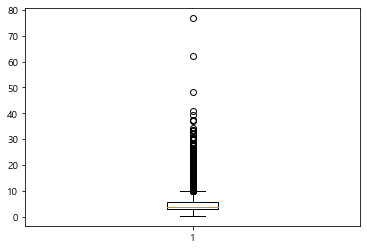

In [41]:
# rent_ua 이상치 파악

min = np.percentile(anal_df['rent_ua'],0)
q1 = np.percentile(anal_df['rent_ua'],25)
q2 = np.percentile(anal_df['rent_ua'],50)
q3 = np.percentile(anal_df['rent_ua'],75)
max = np.percentile(anal_df['rent_ua'],100)

IQR = q3 - q1
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


plt.boxplot(anal_df['rent_ua'])

## rent_ua 컬럼 이상치 제거

In [42]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [43]:
anal_df2.columns

Index(['건축물대장코드', '도시', '구시군', '읍면동', '번', '지', '입주일', '지하총층', '지상총층', '연면적m2',
       '주차대수', '승강기수', 'usage_area', 'cont_area', 'RENT', 'rent_ua', 'rent_ca',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가',
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호'],
      dtype='object')

In [44]:
z = anal_df2[['지하총층', '지상총층',
       '연면적m2', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량',
       '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가',
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       'type_근린상가', 'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부',
       '상가유형번호']]

In [45]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-45-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
0,1,5,1563.66,0,1,15.50,15.50,NaN,1.082077,71533.898,...,519.940374,1.176,10.477,1,0,0,0,0,1,1
1,4,5,8585.08,7,4,103.00,143.92,NaN,1.373136,117064.164,...,497.856179,1.207,10.754,0,1,0,0,1,1,2
2,0,3,172.11,0,1,185.00,200.00,NaN,2.508637,46623.003,...,249.441747,0.363,19.104,1,0,0,0,0,1,1
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9285,1,3,988.04,0,0,41.19,41.19,NaN,0.729846,33569.452,...,275.096339,12.853,39.510,1,0,0,0,0,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1
9287,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,179.564264,7.339,47.818,1,0,0,0,1,0,1


In [46]:
z.isnull().sum()

지하총층             0
지상총층             0
연면적m2            0
주차대수             0
승강기수             0
usage_area       0
cont_area        0
rent_ua        542
지하철거리m           0
승객수점수            0
건물별전기사용량         0
본번별평균사용량         0
횡단보도거리m          0
건물연차             0
공시지가             0
가까운아파트총세대수       0
가까운아파트평균평당가      0
아파트거리            0
주변세대수점수          0
주변평당가점수          0
type_근린상가        0
type_기타상가        0
type_단지내상가       0
type_복합상가        0
주차가능여부           0
승강기여부            0
상가유형번호           0
dtype: int64

In [47]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층           0
지상총층           0
연면적m2          0
주차대수           0
승강기수           0
usage_area     0
cont_area      0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트총세대수     0
가까운아파트평균평당가    0
아파트거리          0
주변세대수점수        0
주변평당가점수        0
type_근린상가      0
type_기타상가      0
type_단지내상가     0
type_복합상가      0
주차가능여부         0
승강기여부          0
상가유형번호         0
dtype: int64

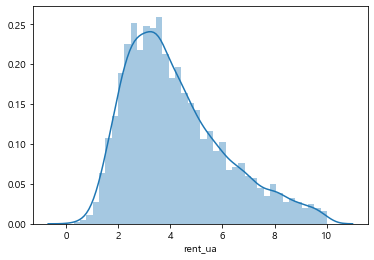

In [49]:
sns.distplot(z.iloc[:,7])
plt.show()

In [20]:
import scipy as sp
import scipy.stats as stats

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


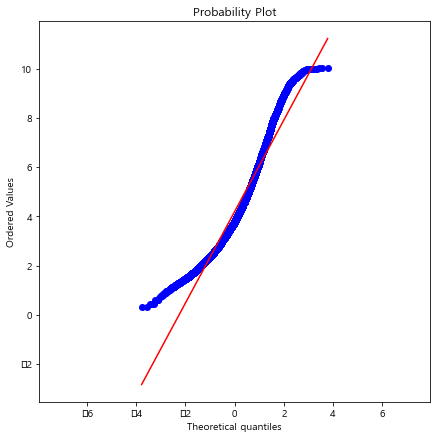

In [50]:
x = z.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [51]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-51-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,597.274432,1.006,8.175,0,1,0,0,1,1,2
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,446.003399,0.216,14.130,1,0,0,0,1,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,237.601835,1.157,19.706,1,0,0,0,1,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1
9287,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,179.564264,7.339,47.818,1,0,0,0,1,0,1


In [52]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8747 entries, 3 to 9288
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8747 non-null   int64  
 1   지상총층         8747 non-null   int64  
 2   연면적m2        8747 non-null   float64
 3   주차대수         8747 non-null   int64  
 4   승강기수         8747 non-null   int64  
 5   usage_area   8747 non-null   float64
 6   cont_area    8747 non-null   float64
 7   rent_ua      8591 non-null   float64
 8   지하철거리m       8747 non-null   float64
 9   승객수점수        8747 non-null   float64
 10  건물별전기사용량     8747 non-null   int64  
 11  본번별평균사용량     8747 non-null   float64
 12  횡단보도거리m      8747 non-null   float64
 13  건물연차         8747 non-null   int64  
 14  공시지가         8747 non-null   int64  
 15  가까운아파트총세대수   8747 non-null   int64  
 16  가까운아파트평균평당가  8747 non-null   float64
 17  아파트거리        8747 non-null   float64
 18  주변세대수점수      8747 non-null   float64
 19  주변평당가점

In [53]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,597.274432,1.006,8.175,0,1,0,0,1,1,2
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,446.003399,0.216,14.130,1,0,0,0,1,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,237.601835,1.157,19.706,1,0,0,0,1,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1
9287,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,179.564264,7.339,47.818,1,0,0,0,1,0,1


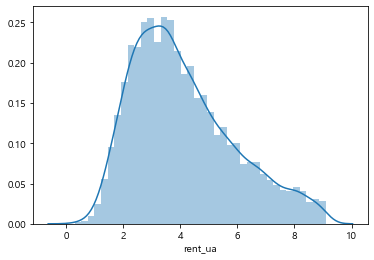

In [54]:
sns.distplot(z1.iloc[:,7])
plt.show()

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


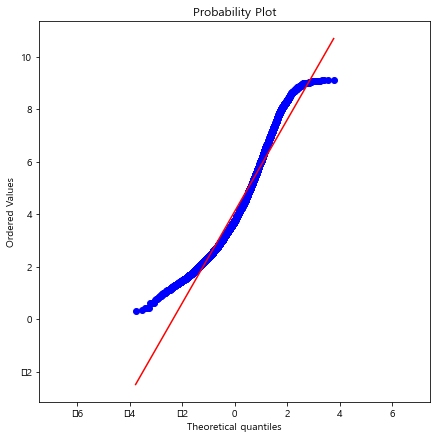

In [55]:
x = z1.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [56]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
지하총층,1.000000,0.476594,0.577159,0.309693,0.373684,0.178501,0.217510,0.117466,-0.009108,0.154973,...,-0.071246,0.029400,0.140952,-0.411948,0.338142,0.079449,0.231353,0.212151,0.339760,0.415419
지상총층,0.476594,1.000000,0.726212,0.558228,0.621230,0.256181,0.289646,0.157253,-0.021406,0.174733,...,-0.067990,-0.006403,0.174032,-0.404995,0.348307,0.067841,0.191034,0.485295,0.612166,0.406954
연면적m2,0.577159,0.726212,1.000000,0.571538,0.550889,0.307725,0.351677,0.179306,0.004093,0.148862,...,-0.113083,0.030430,0.200209,-0.445384,0.392100,0.066663,0.190076,0.415185,0.536059,0.446706
주차대수,0.309693,0.558228,0.571538,1.000000,0.453504,0.208032,0.235462,0.088307,0.040027,0.064922,...,-0.072530,-0.003990,0.162357,-0.244132,0.179965,0.056028,0.185532,0.888363,0.438401,0.248049
승강기수,0.373684,0.621230,0.550889,0.453504,1.000000,0.245526,0.276797,0.185481,-0.045769,0.177142,...,-0.093856,0.018929,0.150828,-0.401734,0.323837,0.083166,0.238518,0.341149,0.993893,0.405664
usage_area,0.178501,0.256181,0.307725,0.208032,0.245526,1.000000,0.970586,0.042949,-0.058687,0.274262,...,0.020790,-0.080243,0.078124,-0.156136,0.148643,0.007144,0.044271,0.173545,0.249465,0.155559
cont_area,0.217510,0.289646,0.351677,0.235462,0.276797,0.970586,1.000000,0.083269,-0.058327,0.286148,...,0.012108,-0.079421,0.098932,-0.197101,0.180528,0.009844,0.073591,0.190263,0.276211,0.197016
rent_ua,0.117466,0.157253,0.179306,0.088307,0.185481,0.042949,0.083269,1.000000,-0.228438,0.349212,...,-0.009010,-0.044145,0.161556,-0.144146,0.119436,0.040080,0.073622,0.046984,0.176832,0.145283
지하철거리m,-0.009108,-0.021406,0.004093,0.040027,-0.045769,-0.058687,-0.058327,-0.228438,1.000000,-0.472455,...,0.024452,0.048871,-0.070407,0.064248,-0.063550,-0.009230,-0.009871,0.058477,-0.042484,-0.063807
승객수점수,0.154973,0.174733,0.148862,0.064922,0.177142,0.274262,0.286148,0.349212,-0.472455,1.000000,...,0.047642,-0.144256,0.048262,-0.174520,0.148345,0.021730,0.089499,0.032448,0.171547,0.175508


In [57]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


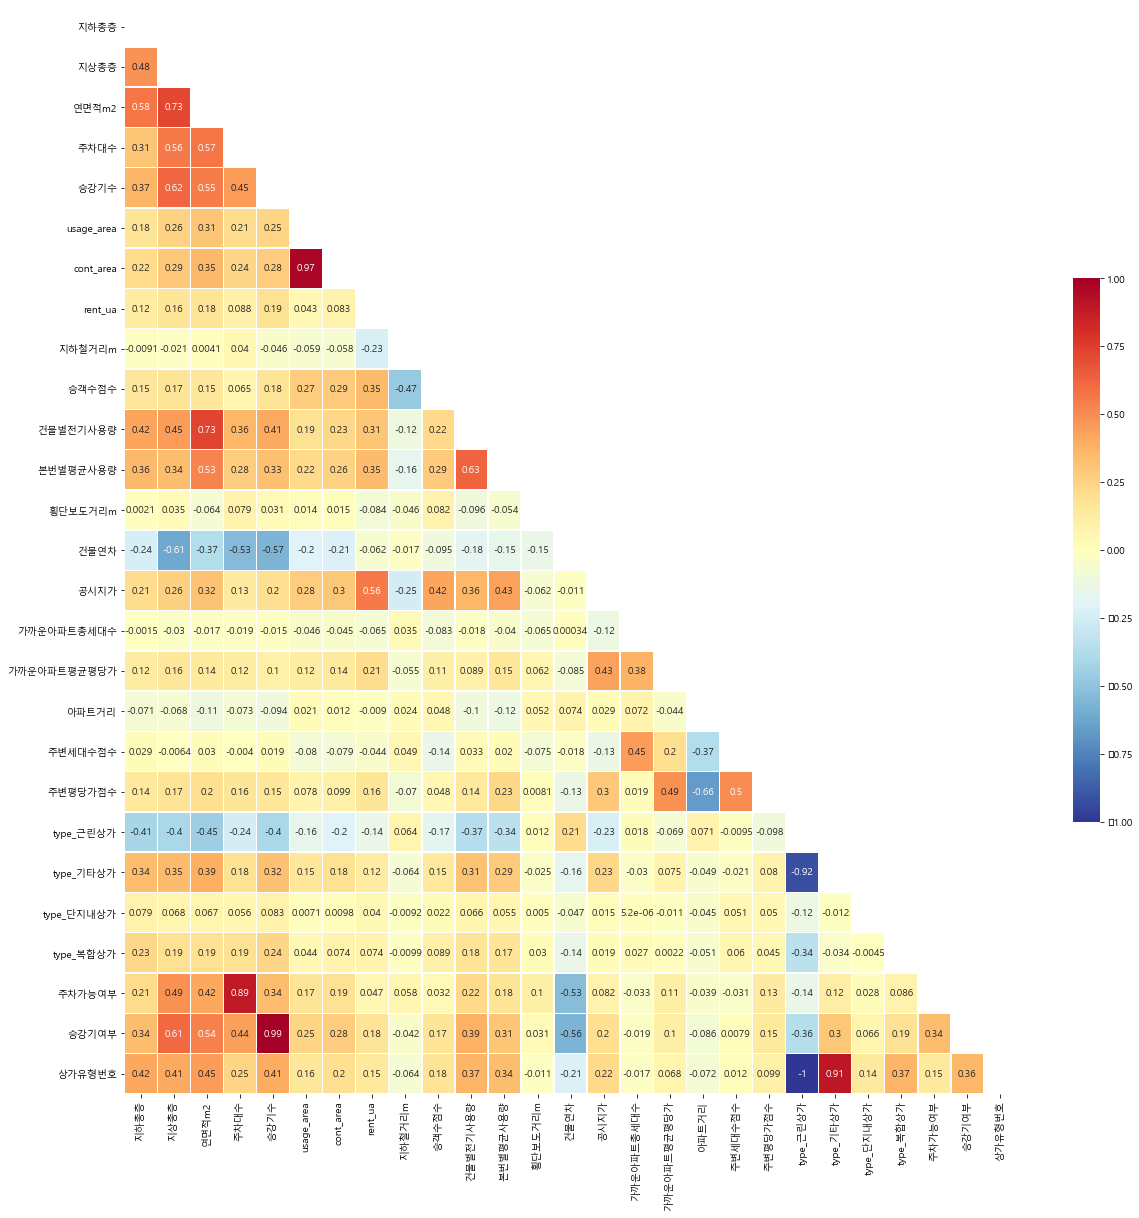

In [58]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 주요컬럼 이상치 제거
* 지하철거리m, 연면적m2, 승객수점수, 건물별전기사용량, 본번별평균사용량, 공시지가, 가까운아파트평균평당가

In [59]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8591 entries, 3 to 9288
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8591 non-null   int64  
 1   지상총층         8591 non-null   int64  
 2   연면적m2        8591 non-null   float64
 3   주차대수         8591 non-null   int64  
 4   승강기수         8591 non-null   int64  
 5   usage_area   8591 non-null   float64
 6   cont_area    8591 non-null   float64
 7   rent_ua      8591 non-null   float64
 8   지하철거리m       8591 non-null   float64
 9   승객수점수        8591 non-null   float64
 10  건물별전기사용량     8591 non-null   int64  
 11  본번별평균사용량     8591 non-null   float64
 12  횡단보도거리m      8591 non-null   float64
 13  건물연차         8591 non-null   int64  
 14  공시지가         8591 non-null   int64  
 15  가까운아파트총세대수   8591 non-null   int64  
 16  가까운아파트평균평당가  8591 non-null   float64
 17  아파트거리        8591 non-null   float64
 18  주변세대수점수      8591 non-null   float64
 19  주변평당가점

In [60]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-60-1eb64b94a9ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,597.274432,1.006,8.175,0,1,0,0,1,1,2
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,446.003399,0.216,14.130,1,0,0,0,1,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,237.601835,1.157,19.706,1,0,0,0,1,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1
9287,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,179.564264,7.339,47.818,1,0,0,0,1,0,1


In [61]:
# 연면적m2 이상값 제거

q1 = z2["연면적m2"].quantile(0.25)
q3 = z2["연면적m2"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z3 = z2.copy()
z3["연면적m2"][(z3["연면적m2"] > (q3 + iqt)) | (z3["연면적m2"] < (q1 - iqt))] = None

z3 = z3.dropna(axis = 0, how= 'any')
z3

<ipython-input-61-02f1bf94b154>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z3["연면적m2"][(z3["연면적m2"] > (q3 + iqt)) | (z3["연면적m2"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,446.003399,0.216,14.130,1,0,0,0,1,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
10,1,3,582.39,5,0,140.00,140.00,2.714286,3.709688,59466.010,...,744.946767,0.615,8.193,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,202.465775,4.221,29.325,1,0,0,0,1,0,1
9282,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,261.907007,26.066,41.068,1,0,0,0,0,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1


In [62]:
# 지하철거리m 이상값 제거

q1 = z3["지하철거리m"].quantile(0.25)
q3 = z3["지하철거리m"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z4 = z3.copy()
z4["지하철거리m"][(z4["지하철거리m"] > (q3 + iqt)) | (z4["지하철거리m"] < (q1 - iqt))] = None

z4 = z4.dropna(axis = 0, how= 'any')
z4

<ipython-input-62-a88591830510>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z4["지하철거리m"][(z4["지하철거리m"] > (q3 + iqt)) | (z4["지하철거리m"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,446.003399,0.216,14.130,1,0,0,0,1,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
10,1,3,582.39,5,0,140.00,140.00,2.714286,3.709688,59466.010,...,744.946767,0.615,8.193,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,202.465775,4.221,29.325,1,0,0,0,1,0,1
9282,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,261.907007,26.066,41.068,1,0,0,0,0,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1


In [63]:
# 건물별전기사용량 이상값 제거

q1 = z4["건물별전기사용량"].quantile(0.25)
q3 = z4["건물별전기사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z5 = z4.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-63-072aa1f9912a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
10,1,3,582.39,5,0,140.00,140.00,2.714286,3.709688,59466.010,...,744.946767,0.615,8.193,1,0,0,0,1,0,1
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,700.505548,1.738,7.496,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,202.465775,4.221,29.325,1,0,0,0,1,0,1
9282,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,261.907007,26.066,41.068,1,0,0,0,0,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1


In [64]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-64-f294d06d6038>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,700.505548,1.738,7.496,1,0,0,0,0,0,1
17,1,4,503.46,3,0,99.06,127.74,5.451242,3.672770,18686.432,...,564.698056,1.518,14.908,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,202.465775,4.221,29.325,1,0,0,0,1,0,1
9282,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,261.907007,26.066,41.068,1,0,0,0,0,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1


In [65]:
# 가까운아파트평균평당가 이상값 제거

q1 = z6["가까운아파트평균평당가"].quantile(0.25)
q3 = z6["가까운아파트평균평당가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z7 = z6.copy()
z7["가까운아파트평균평당가"][(z7["가까운아파트평균평당가"] > (q3 + iqt)) | (z7["가까운아파트평균평당가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-65-bf3d44beffda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["가까운아파트평균평당가"][(z7["가까운아파트평균평당가"] > (q3 + iqt)) | (z7["가까운아파트평균평당가"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,700.505548,1.738,7.496,1,0,0,0,0,0,1
17,1,4,503.46,3,0,99.06,127.74,5.451242,3.672770,18686.432,...,564.698056,1.518,14.908,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,202.465775,4.221,29.325,1,0,0,0,1,0,1
9282,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,261.907007,26.066,41.068,1,0,0,0,0,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1


In [66]:
# 공시지가 이상값 제거

q1 = z7["공시지가"].quantile(0.25)
q3 = z7["공시지가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z8 = z7.copy()
z8["공시지가"][(z8["공시지가"] > (q3 + iqt)) | (z8["공시지가"] < (q1 - iqt))] = None

z8 = z8.dropna(axis = 0, how= 'any')
z8

<ipython-input-66-5e816d3acb66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z8["공시지가"][(z8["공시지가"] > (q3 + iqt)) | (z8["공시지가"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,491.694446,0.810,10.063,1,0,0,0,0,0,1
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,423.295367,1.660,14.742,1,0,0,0,0,0,1
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,700.505548,1.738,7.496,1,0,0,0,0,0,1
17,1,4,503.46,3,0,99.06,127.74,5.451242,3.672770,18686.432,...,564.698056,1.518,14.908,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,202.465775,4.221,29.325,1,0,0,0,1,0,1
9282,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,261.907007,26.066,41.068,1,0,0,0,0,0,1
9284,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,244.901088,18.968,40.630,1,0,0,0,1,0,1
9286,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,14.138738,10.374,109.826,1,0,0,0,1,0,1


## 회귀분석

In [69]:
z8.columns

Index(['지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       'type_근린상가', 'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부',
       '상가유형번호'],
      dtype='object')

In [70]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 상가유형번호', z8)
    
# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

C:\python\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:54:48   Log-Likelihood:                -9434.3
No. Observations:                5568   AIC:                         1.891e+04
Df Residuals:                    5545   BIC:                         1.907e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8012      0.047     16.890      0.000       0.708       0.894
usage_area     -0.0003   4.54e-05     -7.596      0.000      -0.000      -0.000
cont_area   -8.616e-07   2.15e-06     -0.402      0.688   -5.07e-06    3.34e-06
지하총층           -0.1419      0.048     -2.964      0.003      -0.236      -0.048
지상총층           -0.0232      0.020     -1.154      0.249      -0.063       0.016
연면적m2          -0.0006   7.95e-05     -7.066      0.000      -0.001      -0.000
주차대수            0.0220      0.010      2.245      0.025       0.003       0.041
승강기수           -0.1660      0.367     -0.452      0.651      -0.886       0.554
지하철거리m         -0.0246      0.009     -2.802      0.005      -0.042      -0.007
승객수점수        4.847e-06   6.36e-07      7.625      0.000     3.6e-06    6.09e-06
횡단보도거리m        -0.0014      0.000     -3.469      0.001      -0.002      -0.001
건물별전기사용량      5.35e-05   6.62e-06      8.086      0.000    4.05e-05    6.65e-05
본번별평균사용량     1.757e-05   5.89e-06      2.985      0.003    6.03e-06    2.91e-05
건물연차           -0.0100      0.002     -4.849      0.000      -0.014      -0.006
공시지가         3.095e-07   9.22e-09     33.550      0.000    2.91e-07    3.28e-07
가까운아파트총세대수  -5.636e-05   6.87e-05     -0.820      0.412      -0.000    7.83e-05
가까운아파트평균평당가 -5.045e-05   2.84e-05     -1.777      0.076      -0.000    5.21e-06
아파트거리           0.0002      0.000      1.373      0.170   -7.32e-05       0.000
주변세대수점수         0.0117      0.007      1.632      0.103      -0.002       0.026
주변평당가점수        -0.0002      0.001     -0.155      0.877      -0.003       0.002
type_근린상가       0.8251      0.061     13.545      0.000       0.706       0.945
type_기타상가      -0.0239      0.040     -0.604      0.546      -0.102       0.054
type_단지내상가  -2.423e-17   4.05e-17     -0.599      0.549   -1.04e-16    5.51e-17
type_복합상가            0          0        nan        nan           0           0
주차가능여부         -0.1446      0.057     -2.516      0.012      -0.257      -0.032
승강기여부           0.2537      0.376      0.674      0.500      -0.484       0.992
상가유형번호          0.7773      0.063     12.397      0.000       0.654       0.900
==============================================================================
Omnibus:                      580.210   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.268
Skew:                           0.770   Prob(JB):                    2.91e-194
Kurtosis:                       4.213   Cond. No.                     3.38e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-22. This might indicate that there are
strong multicollinearity probl

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [71]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트총세대수',
 '가까운아파트평균평당가',
 '아파트거리',
 '주변세대수점수',
 '주변평당가점수',
 'type_근린상가',
 'type_기타상가',
 'type_단지내상가',
 'type_복합상가',
 '주차가능여부',
 '승강기여부',
 '상가유형번호']

In [73]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

C:\python\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\python\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,컬럼,VIF
0,usage_area,1.160528
1,cont_area,1.005546
2,지하총층,1.260992
3,지상총층,2.593770
4,연면적m2,3.603856
5,주차대수,3.025121
6,승강기수,55.743887
7,지하철거리m,1.193101
8,승객수점수,1.358974
9,횡단보도거리m,1.066986


In [74]:
# 다중공선성 점수 높은 승강기수 컬럼 제외
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 상가유형번호', z8)
    
# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

C:\python\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:55:56   Log-Likelihood:                -9434.4
No. Observations:                5568   AIC:                         1.891e+04
Df Residuals:                    5546   BIC:                         1.906e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8012      0.047     16.890      0.000       0.708       0.894
usage_area     -0.0003   4.54e-05     -7.599      0.000      -0.000      -0.000
cont_area    -8.62e-07   2.15e-06     -0.402      0.688   -5.07e-06    3.34e-06
지하총층           -0.1422      0.048     -2.971      0.003      -0.236      -0.048
지상총층           -0.0231      0.020     -1.148      0.251      -0.062       0.016
연면적m2          -0.0006   7.94e-05     -7.070      0.000      -0.001      -0.000
주차대수            0.0220      0.010      2.246      0.025       0.003       0.041
지하철거리m         -0.0246      0.009     -2.797      0.005      -0.042      -0.007
승객수점수        4.849e-06   6.36e-07      7.629      0.000     3.6e-06     6.1e-06
횡단보도거리m        -0.0014      0.000     -3.470      0.001      -0.002      -0.001
건물별전기사용량     5.353e-05   6.62e-06      8.091      0.000    4.06e-05    6.65e-05
본번별평균사용량     1.754e-05   5.89e-06      2.981      0.003    6.01e-06    2.91e-05
건물연차           -0.0100      0.002     -4.855      0.000      -0.014      -0.006
공시지가         3.095e-07   9.22e-09     33.560      0.000    2.91e-07    3.28e-07
가까운아파트총세대수  -5.626e-05   6.87e-05     -0.819      0.413      -0.000    7.84e-05
가까운아파트평균평당가 -5.057e-05   2.84e-05     -1.781      0.075      -0.000    5.08e-06
아파트거리           0.0002      0.000      1.380      0.168   -7.23e-05       0.000
주변세대수점수         0.0118      0.007      1.637      0.102      -0.002       0.026
주변평당가점수        -0.0002      0.001     -0.157      0.875      -0.003       0.002
type_근린상가       0.8252      0.061     13.547      0.000       0.706       0.945
type_기타상가      -0.0241      0.040     -0.608      0.544      -0.102       0.054
type_단지내상가   -4.65e-18   1.91e-18     -2.438      0.015   -8.39e-18   -9.11e-19
type_복합상가            0          0        nan        nan           0           0
주차가능여부         -0.1448      0.057     -2.521      0.012      -0.257      -0.032
승강기여부           0.0860      0.065      1.330      0.184      -0.041       0.213
상가유형번호          0.7771      0.063     12.395      0.000       0.654       0.900
==============================================================================
Omnibus:                      580.271   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.549
Skew:                           0.770   Prob(JB):                    2.53e-194
Kurtosis:                       4.213   Cond. No.                     3.44e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트총세대수',
 '가까운아파트평균평당가',
 '아파트거리',
 '주변세대수점수',
 '주변평당가점수',
 'type_근린상가',
 'type_기타상가',
 'type_단지내상가',
 'type_복합상가',
 '주차가능여부',
 '승강기여부',
 '상가유형번호']

In [76]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

C:\python\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\python\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,컬럼,VIF
0,usage_area,1.160501
1,cont_area,1.005546
2,지하총층,1.260728
3,지상총층,2.593330
4,연면적m2,3.603612
5,주차대수,3.025109
6,지하철거리m,1.192928
7,승객수점수,1.358902
8,횡단보도거리m,1.066983
9,건물별전기사용량,1.754592


In [77]:
# p-value > 0.05 변수 제외

model3 = ols('rent_ua ~ usage_area + 지하총층 + 연면적m2 + 주차대수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + type_근린상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 상가유형번호', z8)
    
# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

C:\python\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     187.4
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:59:21   Log-Likelihood:                -9440.5
No. Observations:                5568   AIC:                         1.891e+04
Df Residuals:                    5554   BIC:                         1.900e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7869      0.036     21.998      0.000       0.717       0.857
usage_area    -0.0003    4.5e-05     -7.565      0.000      -0.000      -0.000
지하총층          -0.1570      0.047     -3.342      0.001      -0.249      -0.065
연면적m2         -0.0006      7e-05     -8.351      0.000      -0.001      -0.000
주차대수           0.0237      0.010      2.448      0.014       0.005       0.043
지하철거리m        -0.0238      0.009     -2.713      0.007      -0.041      -0.007
승객수점수       4.913e-06    6.3e-07      7.804      0.000    3.68e-06    6.15e-06
횡단보도거리m       -0.0014      0.000     -3.690      0.000      -0.002      -0.001
건물별전기사용량      5.5e-05   6.54e-06      8.410      0.000    4.22e-05    6.78e-05
본번별평균사용량    1.784e-05   5.86e-06      3.042      0.002    6.35e-06    2.93e-05
건물연차          -0.0098      0.002     -5.536      0.000      -0.013      -0.006
공시지가        3.017e-07   8.12e-09     37.158      0.000    2.86e-07    3.18e-07
type_근린상가      0.8177      0.068     12.073      0.000       0.685       0.950
type_단지내상가          0          0        nan        nan           0           0
type_복합상가           0          0        nan        nan           0           0
주차가능여부        -0.1667      0.056     -2.965      0.003      -0.277      -0.056
상가유형번호         0.7561      0.071     10.670      0.000       0.617       0.895
==============================================================================
Omnibus:                      583.950   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.136
Skew:                           0.775   Prob(JB):                    4.20e-195
Kurtosis:                       4.207   Cond. No.                     9.35e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-57. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


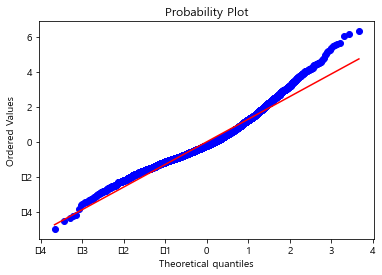

In [78]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + 지하총층 + 연면적m2 + 주차대수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + type_근린상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 상가유형번호', data = z8)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()